# Lab 7 - Data Transformation on Population Dataset
**Name: Sneha Gupta** <br>
**Class: 3BScEA** <br>
**RegNo.: 21112341**
<hr>

* Perform Label Encoding on Region Column
* Perform Min-Max Scaler on Year
* Perform Normalisation on Value <br>
1) Filter any three countries from the list, and make a time-series plot of Population Increase <br>
2) Which Region had the maximum percentage changes in the Population? <br>
3) Which Region had the least increment in Number of People?

### Label Encoding

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/Lenovo/Downloads/population_csv.csv")
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
le = LabelEncoder()
le

LabelEncoder()

In [4]:
le.fit(df['Country Name'])

LabelEncoder()

In [5]:
df['Country Name'] = le.transform(df['Country Name'])

In [6]:
df

,Country Name,Country Code,Year,Value
0,7,ARB,1960,92197753
1,7,ARB,1961,94724510
2,7,ARB,1962,97334442
3,7,ARB,1963,100034179
4,7,ARB,1964,102832760
...,...,...,...,...
15404,262,ZWE,2014,13586681
15405,262,ZWE,2015,13814629
15406,262,ZWE,2016,14030390
15407,262,ZWE,2017,14236745


* min max gives value between 0 and 1 <br>
* normalization -1 to 1

### Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
ss

StandardScaler()

In [9]:
ss.fit(df[['Value']])

StandardScaler()

In [10]:
ss.transform(df[['Value']])

array([[-0.16878904],
       [-0.16511006],
       [-0.16130998],
       ...,
       [-0.28260143],
       [-0.28230098],
       [-0.28200647]])

### Min Max Scaler

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
pp = MinMaxScaler()
pp

MinMaxScaler()

In [13]:
pp.fit(df[['Year']])

MinMaxScaler()

In [14]:
pp.transform(df[['Year']])

array([[0.        ],
       [0.01724138],
       [0.03448276],
       ...,
       [0.96551724],
       [0.98275862],
       [1.        ]])

#### 1) Filter any three countries from the list, and make a time-series plot of Population Increase 

In [15]:
x = df.loc[df["Country Name"] == 7]
y = df.loc[df["Country Name"] == 262]
z = df.loc[df["Country Name"] == 41]

In [16]:
new_df = pd.DataFrame()
new_df = new_df.append(x)
new_df = new_df.append(y)
new_df = new_df.append(z)
new_df

,Country Name,Country Code,Year,Value
0,7,ARB,1960,92197753
1,7,ARB,1961,94724510
2,7,ARB,1962,97334442
3,7,ARB,1963,100034179
4,7,ARB,1964,102832760
...,...,...,...,...
5010,41,TCD,2014,13663559
5011,41,TCD,2015,14110975
5012,41,TCD,2016,14561666
5013,41,TCD,2017,15016773


<AxesSubplot:xlabel='Year'>

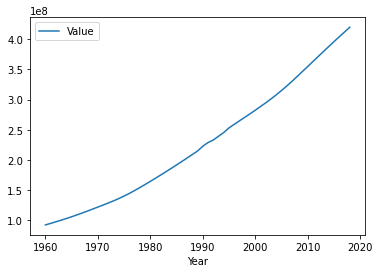

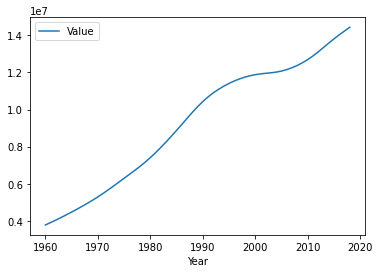

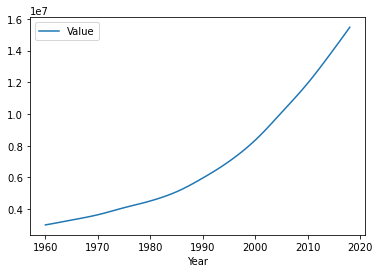

In [17]:
x.plot(x="Year",y="Value")
y.plot(x="Year",y="Value")
z.plot(x="Year",y="Value")

#### 2) Which Region had the maximum percentage changes in the Population? 

In [18]:
df['Percentage_Change'] = df['Value'].sub(100000000)
df

,Country Name,Country Code,Year,Value,Percentage_Change
0,7,ARB,1960,92197753,-7802247
1,7,ARB,1961,94724510,-5275490
2,7,ARB,1962,97334442,-2665558
3,7,ARB,1963,100034179,34179
4,7,ARB,1964,102832760,2832760
...,...,...,...,...,...
15404,262,ZWE,2014,13586681,-86413319
15405,262,ZWE,2015,13814629,-86185371
15406,262,ZWE,2016,14030390,-85969610
15407,262,ZWE,2017,14236745,-85763255


In [23]:
country = list(df['Country Code'].unique())

In [28]:
df_copy = df[df['Country Code'] == country[0]]

In [30]:
len(df_copy)

59

In [31]:
df_copy.head()

,Country Name,Country Code,Year,Value,Percentage_Change
0,7,ARB,1960,92197753,-7802247
1,7,ARB,1961,94724510,-5275490
2,7,ARB,1962,97334442,-2665558
3,7,ARB,1963,100034179,34179
4,7,ARB,1964,102832760,2832760


In [32]:
array = []

for i in range(len(df_copy)):
    if i == len(df_copy):
        break
    else:
        array.append(df['Value'][i+1] - df['Value'][i])

In [34]:
max(array)

8284844

In [27]:
df['Value'][df['Country Code'] == "ARB"]

0      92197753
1      94724510
2      97334442
3     100034179
4     102832760
5     105736431
6     108758610
7     111899364
8     115136178
9     118437195
10    121785650
11    125164745
12    128598734
13    132161298
14    135952252
15    140040649
16    144453278
17    149161891
18    154111175
19    159218552
20    164420785
21    169698994
22    175061792
23    180505996
24    186035305
25    191650331
26    197338142
27    203084971
28    208889682
29    214753970
30    222653373
31    228731685
32    232956352
33    239243261
34    245449409
35    253107289
36    259000953
37    264822188
38    270575803
39    276393837
40    282344154
41    288432163
42    294665185
43    301113849
44    307862843
45    314965793
46    322452754
47    330290716
48    338395961
49    346629220
50    354890042
51    363158703
52    371443547
53    379705719
54    387907748
55    396028278
56    404024433
57    411898965
58    419790588
Name: Value, dtype: int64

In [ ]:
for i in range(len(df['']))

In [20]:
a = df.loc[df["Year"] == 1960]
b = df.loc[df["Year"] == 2010]

In [21]:
new_df1 = pd.DataFrame()
new_df1 = new_df1.append(df["Country Name"])
new_df1 = new_df1.append(a)
new_df1 = new_df1.append(b)
new_df1

,0,1,2,3,4,5,6,7,8,9,...,15404,15405,15406,15407,15408,Country Code,Country Name,Percentage_Change,Value,Year
Country Name,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,262.0,262.0,262.0,262.0,262.0,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ARB,7.0,-7802247.0,92197753.0,1960.0
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,CSS,37.0,-95805290.0,4194710.0,1960.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,CEB,40.0,-8598236.0,91401764.0,1960.0
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,EAR,60.0,880085256.0,980085256.0,1960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,VIR,257.0,-99891642.0,108358.0,2010.0
15223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PSE,258.0,-96213839.0,3786161.0,2010.0
15282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,YEM,260.0,-76845145.0,23154855.0,2010.0
15341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,ZMB,261.0,-86394016.0,13605984.0,2010.0


<hr>